# Customer Complaints Classification

## Project Overview

This project leverages Natural Language Processing (NLP) techniques to automatically classify customer complaints. By training an NLP model to understand the content of complaints, the system can reduce the number of questions customers need to answer before submitting their issues. The primary goals are:

1. To minimize the time customers spend logging complaints by reducing the number of survey questions.
2. To create a user-friendly platform that allows customers to quickly submit their complaints or feedback.

Objectives:

* Train an NLP model to automatically classify consumer complaints into predefined categories based on their content.
* Enhance the customer complaint logging experience by streamlining the complaint submission process.
* Improve financial institutions' responsiveness by providing faster, more accurate categorization of complaints.

This project will explore the use of machine learning models such as text classification algorithms, potentially including logistic regression, support vector machines, or neural networks, combined with advanced NLP techniques like TF-IDF and word embeddings to understand the nature of customer complaints effectively.

## Business Understanding

**Problem Statement**:

Customers of financial institutions often experience significant frustration and dissatisfaction when lodging complaints related to financial services. The existing complaint submission processes typically involve navigating through multiple selection options or answering a series of questions generated by chatbots. This complexity not only prolongs the time required to submit a complaint but also adds to customer frustration, especially when timely resolution is critical. There is a pressing need for a faster and more efficient method for customers to lodge complaints without the burden of excessive questioning.

**Root Causes**:

* **Complex Navigation Structures:** Current platforms require customers to traverse numerous menus and options, making the submission process cumbersome.

* **Inefficient Chatbot Interactions:** Chatbots often generate redundant or irrelevant questions, leading to extended interaction times and increased customer irritation.

* **Lack of Personalization:** The absence of tailored pathways for different types of complaints results in a one-size-fits-all approach that does not address specific customer needs effectively.

* **Inadequate Data Utilization:** Existing systems may not fully leverage customer data to streamline the complaint submission process, leading to repetitive information requests.

**Key stakeholders:**

**1. Customers:** Play a crucial role in submitting complaints and providing feedback regarding financial services. They are primarily interested in seeking a quick and hassle-free method to lodge complaints and receive timely resolutions. To achieve this, customers require an intuitive and straightforward complaint submission interface that minimizes the number of steps and questions needed to lodge a complaint. Additionally, they seek assurance that their issues will be resolved promptly and effectively.

**2. Customer Service Support Teams:** Responsible for handling and resolving customer complaints efficiently. Their primary interest lies in managing and categorizing incoming complaints swiftly to expedite resolutions. To support these goals, they require simplified complaint categorization processes that speed up resolution times. Additionally, access to comprehensive and accurate complaint data is essential for effective management. Tools that allow them to track and monitor complaint statuses efficiently are also necessary to maintain high levels of service quality.

## Data Understanding

The Consumer Complaints Dataset from the Consumer Financial Protection Bureau (CFPB) provides a comprehensive source of real-world data on consumer grievances about various financial products and services. This dataset, accessible to the public, is particularly useful for natural language processing (NLP) projects, as it includes detailed narratives describing consumer complaints. These narratives cover disputes ranging from credit reporting issues to debt collection practices, providing a valuable foundation for developing an NLP model that can automatically classify and route complaints.

The dataset version we leveraged from kaggle includes thousands of consumer submissions categorized into five (5) financial product classes:

* Credit Reporting
* Debt Collection
* Mortgages and Loans (includes car loans, payday loans, student loans, etc.)
* Credit Cards 
* Retail Banking (includes checking/savings accounts, as well as money transfers, etc.)


It consists of around 162,400 records, with narratives of varying lengths and detail. Although this categorization streamlined the data, it remains imbalanced, with 56% of complaints relating to credit reporting issues and the remaining categories ranging between 8% and 14%. This imbalance presents a challenge in building an effective model, requiring tailored strategies to ensure accurate and balanced classification across all categories.



## Data Exploration

In [9]:
import zipfile
import pandas as pd

# Load and inspect the data
# Define the path to the zip file and the CSV file inside it
zip_path = 'data_comp.zip'
csv_filename = 'consumer_complaints.csv'

# Open the zip file and load the CSV file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(csv_filename) as file:
        df = pd.read_csv(file)

# Displaying the first few raws of the dataframe
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [10]:
# Displaying basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


The dataset has 162,421 entries and three columns:

1. **Unnamed: 0:** Appears to be an index column and can be ignored or removed.
2. **product:** Contains the complaint category (target variable) with values like credit_card, retail_banking, credit_reporting, etc.
3. **narrative:** Contains the text of each complaint.

Notably, the narrative column has 10 missing entries.

In [11]:
# Dropping the unnecessary 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Dropping rows with missing values in the 'narrative' column
df = df.dropna(subset=['narrative'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162411 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [ ]:
# Checking for duplicate rows based on 'product' and 'narrative' columns
duplicates = df.duplicated(subset=['product', 'narrative']).sum()

duplicates

There are 37,735 duplicate entries in the dataset based on the product and narrative columns. However, we opted to keep them since during model selection and training, we noted that removing the duplicates negatively impacted our best model performance.

In [12]:
# Checking the distribution of the 'product' categories
product_distribution = df['product'].value_counts()

product_distribution

credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: product, dtype: int64

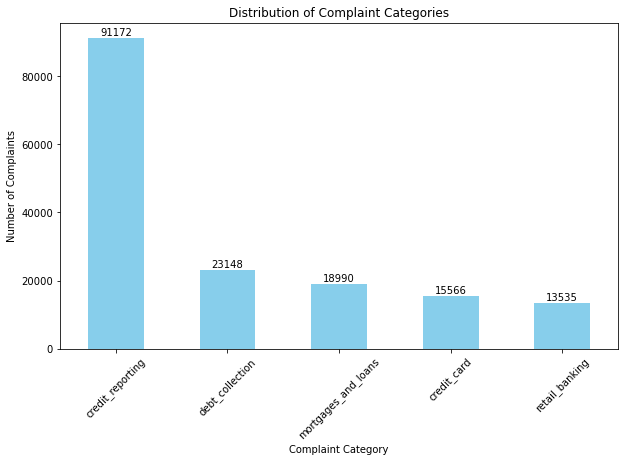

In [13]:
import matplotlib.pyplot as plt

# Plotting the distribution of complaint categories with complaint counts on top of each bar
plt.figure(figsize=(10, 6))
ax = product_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Complaint Categories')
plt.xlabel('Complaint Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)

# Adding text labels on top of each bar
for i, count in enumerate(product_distribution):
    ax.text(i, count + 200, str(count), ha='center', va='bottom')

plt.show()

The distribution shows a class imbalance, with the credit_reporting category significantly more represented than others. We accounted for the imbalance through stratify parameter when separating the features and target to ensures that the class distribution in the training and testing sets matches that of the original dataset. Attempt to apply Synthetic Minority Oversampling Technique (SMOTE) didn't work due to memory resources limitation. However, the models performance was above average indicating that there was no need to perform further data balancing.

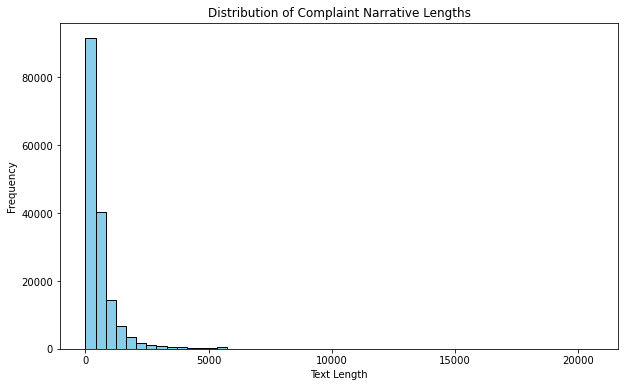

count    162411.000000
mean        588.535838
std         830.977413
min           3.000000
25%         192.000000
50%         361.000000
75%         683.000000
max       20596.000000
Name: text_length, dtype: float64

In [15]:
import matplotlib.pyplot as plt

# Checking the length of the complaint narrative
# Calculating the length of each complaint narrative
df['text_length'] = df['narrative'].apply(len)

# Summary statistics for text length
text_length_summary = df['text_length'].describe()

# Plotting the distribution of text length
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

text_length_summary

The histogram indicates a right-skewed distribution, with most narratives having fewer than 1,000 characters. This information is helpful for choosing an appropriate text processing approach and handling extremely short or long complaints if necessary.

## Data Preprocessing

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Ensure that NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initializing stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Defining the preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back into a single string with whitespace handling
    cleaned_text = ' '.join(words).strip()  # Remove leading/trailing whitespace
    return ' '.join(cleaned_text.split())    # Replace multiple spaces with a single space

# Applying preprocessing to the 'narrative' column
df['cleaned_narrative'] = df['narrative'].apply(preprocess_text)

# Displaying a sample of the cleaned narratives
df[['narrative', 'cleaned_narrative']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\engig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\engig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\engig\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,narrative,cleaned_narrative
0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...
1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...
2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...
3,payment history missing credit report speciali...,payment history missing credit report speciali...
4,payment history missing credit report made mis...,payment history missing credit report made mis...


Key Steps Included:

* **Lowercasing:** Ensures uniformity.
* **Removing Special Characters and Numbers:** Cleans up non-essential elements.
* **Tokenization:** Splits text into words.
* **Stop Word Removal:** Filters out common but non-informative words.
* **Lemmatization:** Reduces words to their root forms.
* **Whitespace Handling:** Trims leading/trailing whitespace and replaces multiple spaces with a single space for consistency.

The pipeline gives  a well-processed cleaned_narrative column, ready for further transformation into numerical features using appropriate techniques.

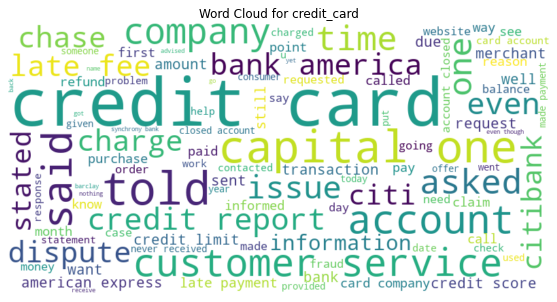

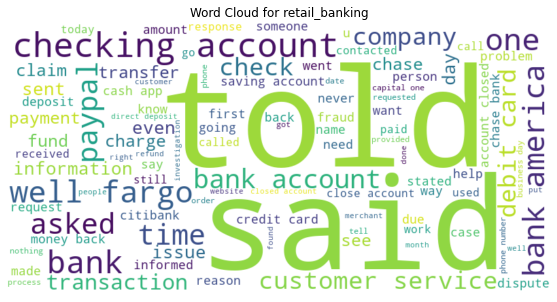

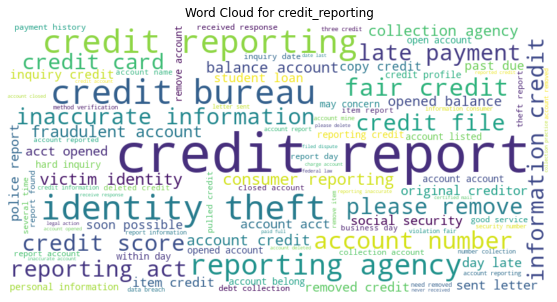

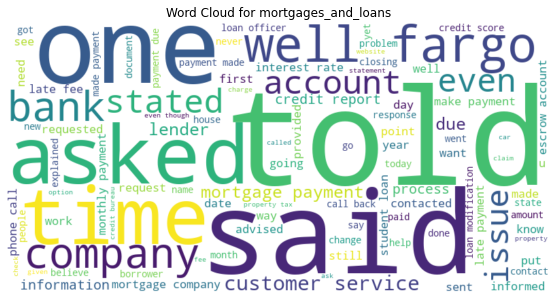

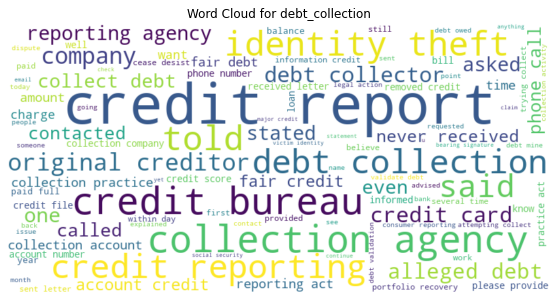

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Checking the most common words in each class
# Function to generate word cloud for each product label
def generate_word_cloud(data, product_label):
    text = ' '.join(data['cleaned_narrative'][data['product'] == product_label])
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {product_label}')
    plt.axis('off')
    plt.show()

# Get unique product labels
product_labels = df['product'].unique()

# Generate and display word cloud for each product label
for label in product_labels:
    generate_word_cloud(df, label)

Brief comments of the word clouds for each product label:

1. **Credit Card:** Key terms include "credit card," "charge," "account," "dispute," and "customer service," indicating frequent issues around charges, disputes, and account management with credit card providers.

2. **Retail Banking:** Words like "checking," "transaction," "account," "bank," and "debit" appear prominently, suggesting common complaints related to checking accounts, bank transactions, and debit cards.

3. **Credit Reporting:** Key words include "credit report," "bureau," "identity theft," and "inaccurate information," reflecting common issues with credit report accuracy, identity theft, and dealing with credit bureaus.

4. **Mortgages and Loans:** Words like "loan," "mortgage," "payment," "account," and "lender" dominate, pointing to frequent concerns with loan applications, mortgage payments, and interactions with lenders.

5. **Debt Collection:** Terms like "debt," "collection," "credit report," "creditor," and "identity theft" are prevalent, indicating issues around debt collection practices, credit reporting, and identity-related problems.

Each word cloud highlights specific terms associated with common issues for each product, showing that customer complaints are centered around distinct themes based on the product type. This information can help tailor the model to capture nuances within each category effectively.

In [18]:
import pandas as pd

# Calculate text length
if 'text_length' not in df.columns:
    df['text_length'] = df['cleaned_narrative'].apply(len)

# Calculate word count
if 'number_of_words' not in df.columns:
    df['number_of_words'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Adding text length column (character count for each narrative)
df['text_length'] = df['cleaned_narrative'].apply(len)

# Adding word count column (number of words in each narrative)
df['number_of_words'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Display the relevant columns in the DataFrame
cleaned_df = df[['product', 'cleaned_narrative', 'text_length', 'number_of_words']]

# View the first few rows
cleaned_df.head()

,product,cleaned_narrative,text_length,number_of_words
0,credit_card,purchase order day shipping amount receive pro...,1705,230
1,credit_card,forwarded message date tue subject please inve...,904,132
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,173
3,credit_reporting,payment history missing credit report speciali...,903,131
4,credit_reporting,payment history missing credit report made mis...,851,123


Above creates a dataframe which includes the product, cleaned_narrative, text_length, and number_of_words columns for easy inspection.

In [19]:
from sklearn.preprocessing import LabelEncoder

# Ensure cleaned_df is a copy of the original DataFrame
cleaned_df = cleaned_df.copy()

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'product' column and assign it to the new 'target' column
cleaned_df['target'] = label_encoder.fit_transform(cleaned_df['product'])

# Display the first few rows to verify the target encoding
cleaned_df.head()

,product,cleaned_narrative,text_length,number_of_words,target
0,credit_card,purchase order day shipping amount receive pro...,1705,230,0
1,credit_card,forwarded message date tue subject please inve...,904,132,0
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,173,4
3,credit_reporting,payment history missing credit report speciali...,903,131,1
4,credit_reporting,payment history missing credit report made mis...,851,123,1


Above encodes the product column into numeric labels and assign it to a new column called target.

In [20]:
# Create a dictionary to map each product category to its numeric label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Mapping of product categories to numeric targets:")
for product, target in label_mapping.items():
    print(f"{product}: {target}")

Mapping of product categories to numeric targets:
credit_card: 0
credit_reporting: 1
debt_collection: 2
mortgages_and_loans: 3
retail_banking: 4


## Data Transformation

In [21]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target (y)
X = cleaned_df['cleaned_narrative']
y = cleaned_df['target']

# Perform the train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting splits
print("Training set shapes (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shapes (X_test, y_test):", X_test.shape, y_test.shape)

Training set shapes (X_train, y_train): (129928,) (129928,)
Testing set shapes (X_test, y_test): (32483,) (32483,)


Above provides the training and testing sets, with class balance maintained across splits.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Step 1: Apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Apply MinMax Scaling
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())
X_test_scaled = scaler.transform(X_test_tfidf.toarray())

# Print the shapes of the transformed features to verify
print("Scaled Training set shape:", X_train_scaled.shape)
print("Scaled Testing set shape:", X_test_scaled.shape)

Scaled Training set shape: (129928, 5000)
Scaled Testing set shape: (32483, 5000)


Above provides, `X_train_scaled` and `X_test_scaled` transformed features that are ready for modeling

## Model Training